### Time Series Analysis

**(TO-DO)**

- Get the dataframe from patients
    - DONE
- Analyze the columns
    - This is given by the .describe() method
- Check for noise and artefacts
    - Noise seems to be low. The range of the values in the EEG signal seems to correlate with seizure as a change in the amplitude and frequency characteristics of the wave is visible in the signal.
- Can we check the preictal and postictal state for comparision?
    - However, we are not given the clinical end time for the patients' data. How well will the solution be considered in terms of sensitivity?

In [2]:
# Imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

### Seizure Windows
The seizure windows to be considered for the purpose of analysis is obtained using the `start_times` which is a list of all the patients' EEG data witht the clinical start time of the ictal state. The `delta_time_minus` and `delta_time_plus` are the time deviations subracted and added to the corresponding clinical start times to achieve the window required for the ictal state prediction. 

This window is not going to be considered for feature extraction. It is the time until which this state starts. Hence, the pre ictal state window will have the following end time:<br>

`end_time` = `start_time` - `delta_time_minus`  and the corresponding width of the windows will vary from 1 to 10 seconds with 1 second increments. The case of non-overlapping and overlapping windows will be taken into account. The sampling frequency of all the patients except the 7th is 200 Hz, and for the 7th patient it's 256 Hz.

### Saving the current Seizure Window data into a separate CSV file
This can be done using the `dataframe.to_csv()` function. The data can be used to compare the results later when the analysis is done using the data until the ictal state using the data from the preictal state. 

1. Plot of AB sz1.csv
Writing data done!


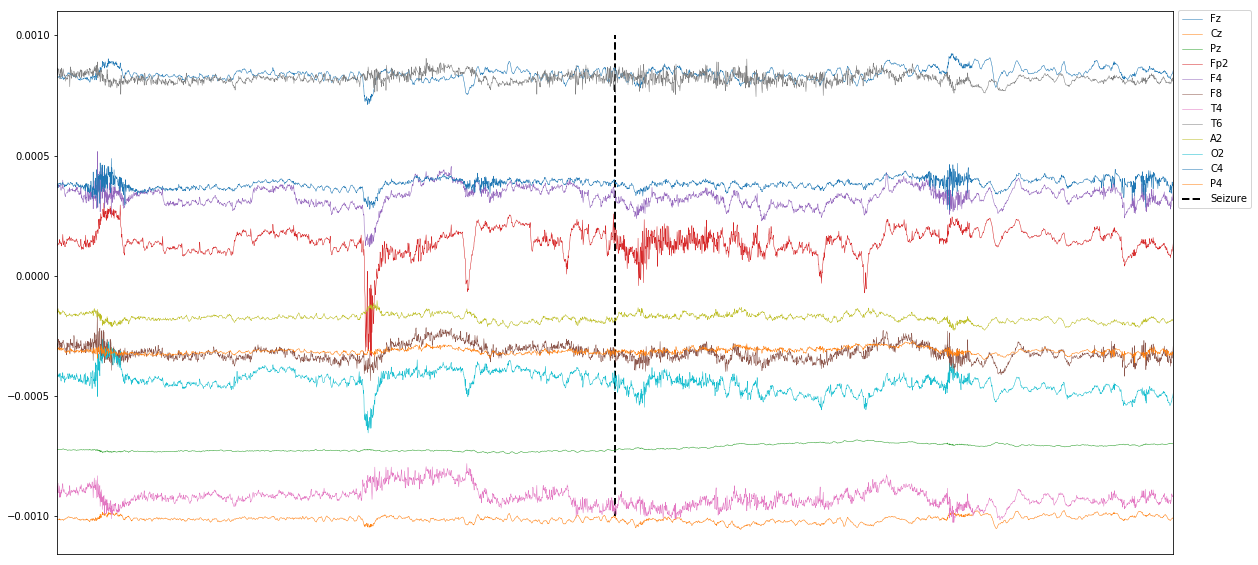

2. Plot of AI sz1.csv
Writing data done!


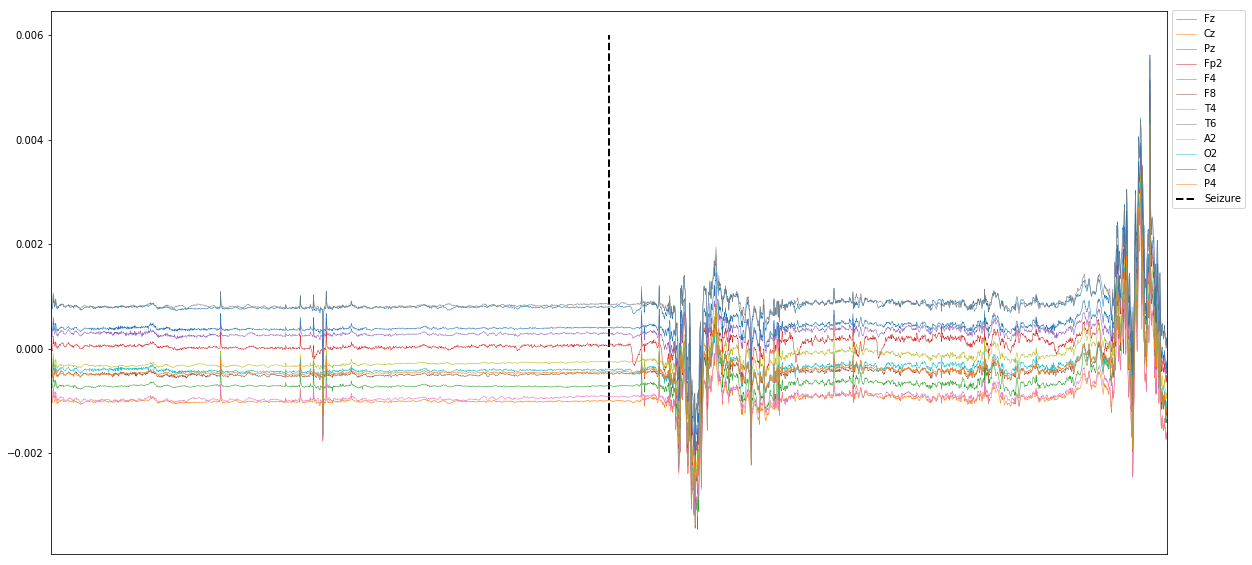

3. Plot of AI sz2.csv
Writing data done!


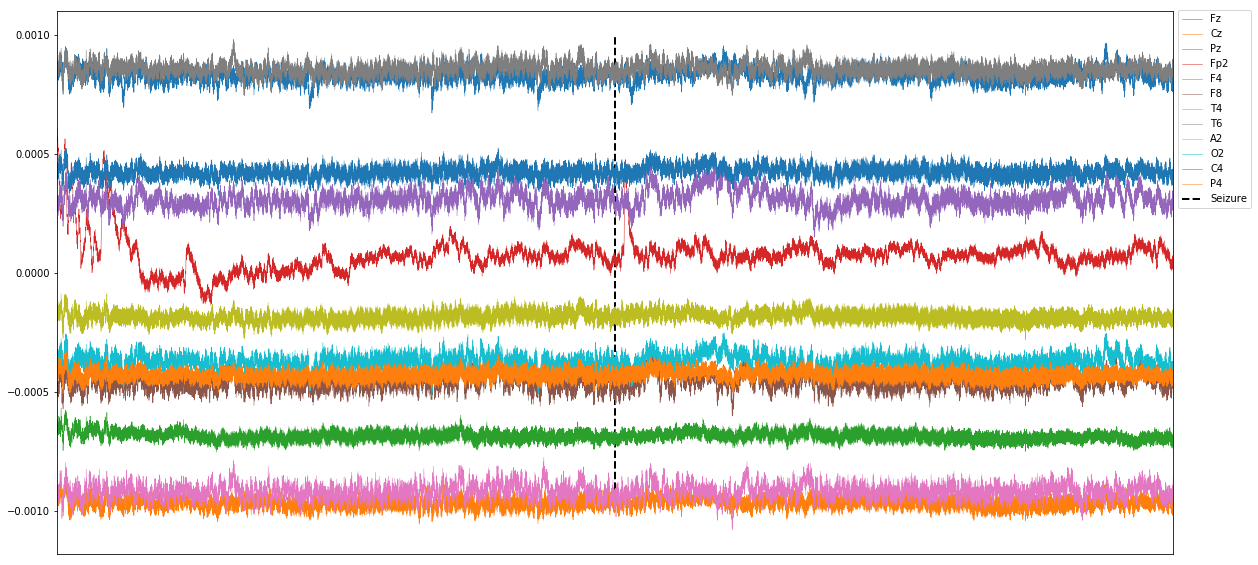

4. Plot of CR sz1.csv
Writing data done!


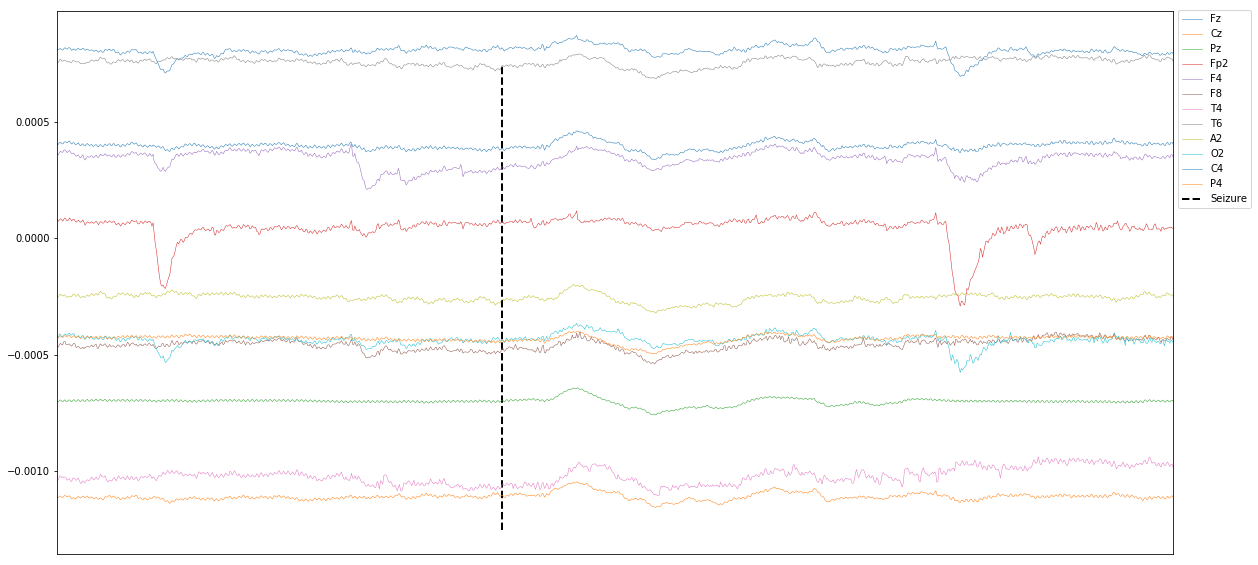

5. Plot of CR sz2.csv
Writing data done!


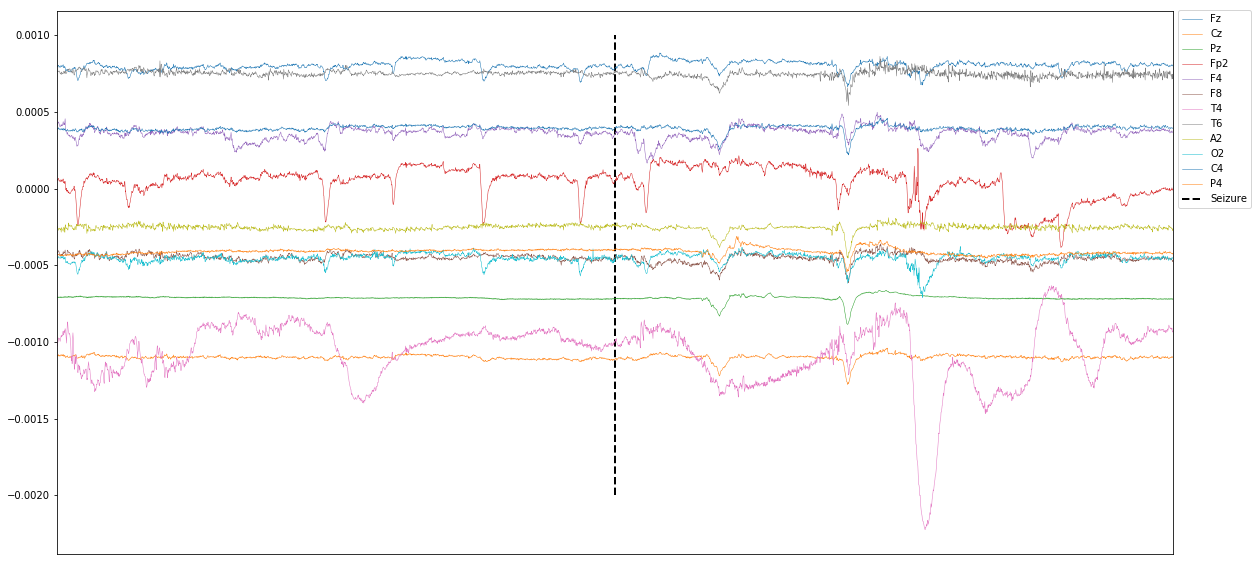

6. Plot of CR sz3.csv
Writing data done!


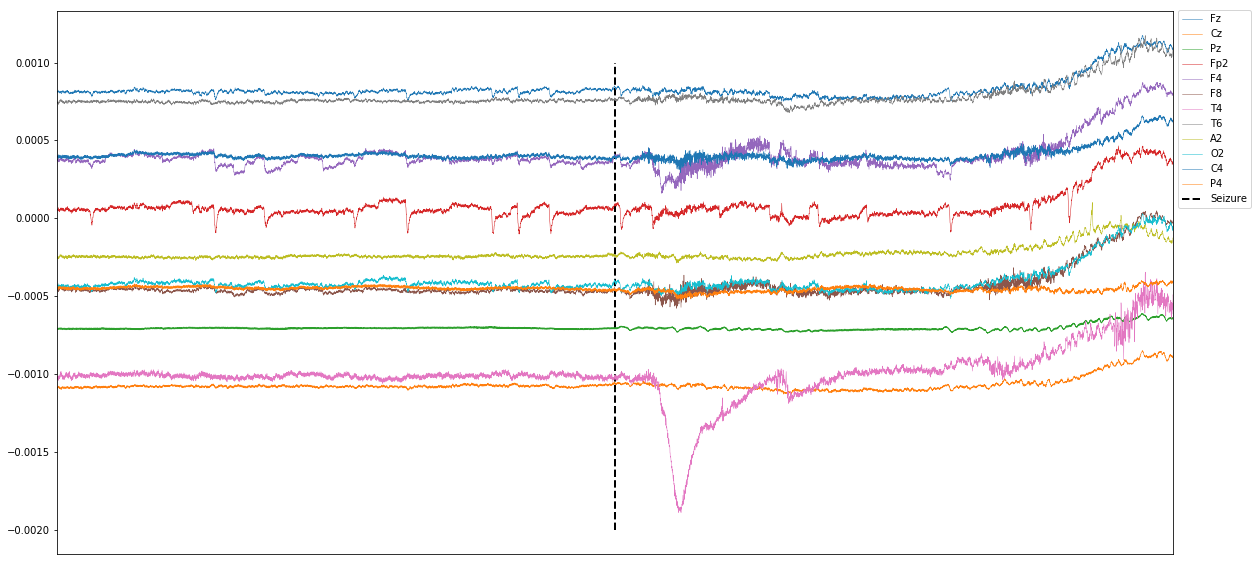

7. Plot of DM sz1.csv
Writing data done!


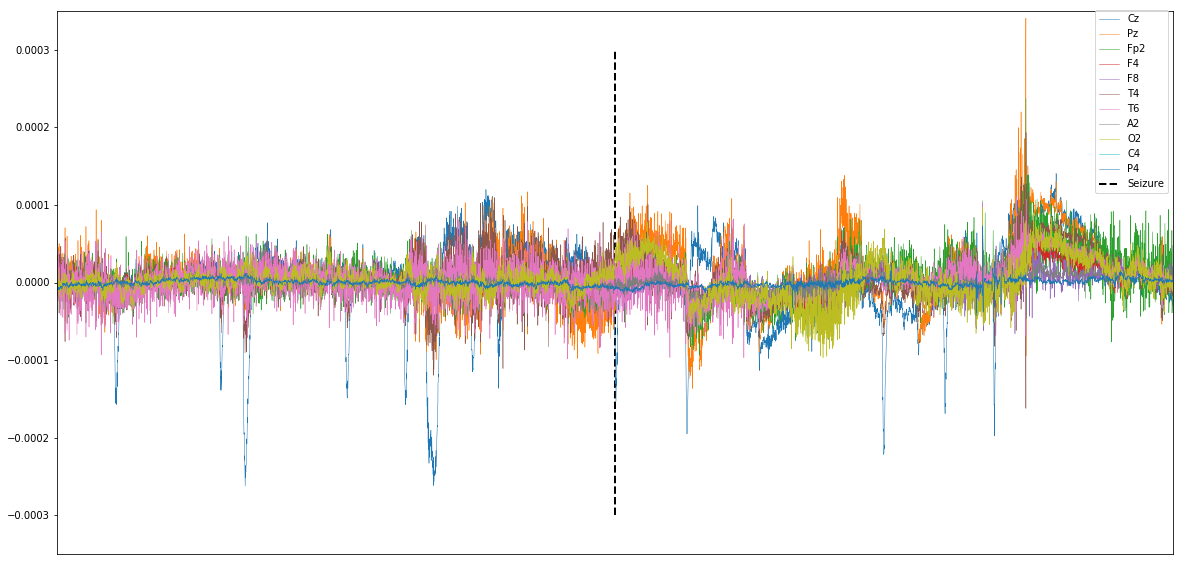

8. Plot of JM sz1.csv
Writing data done!


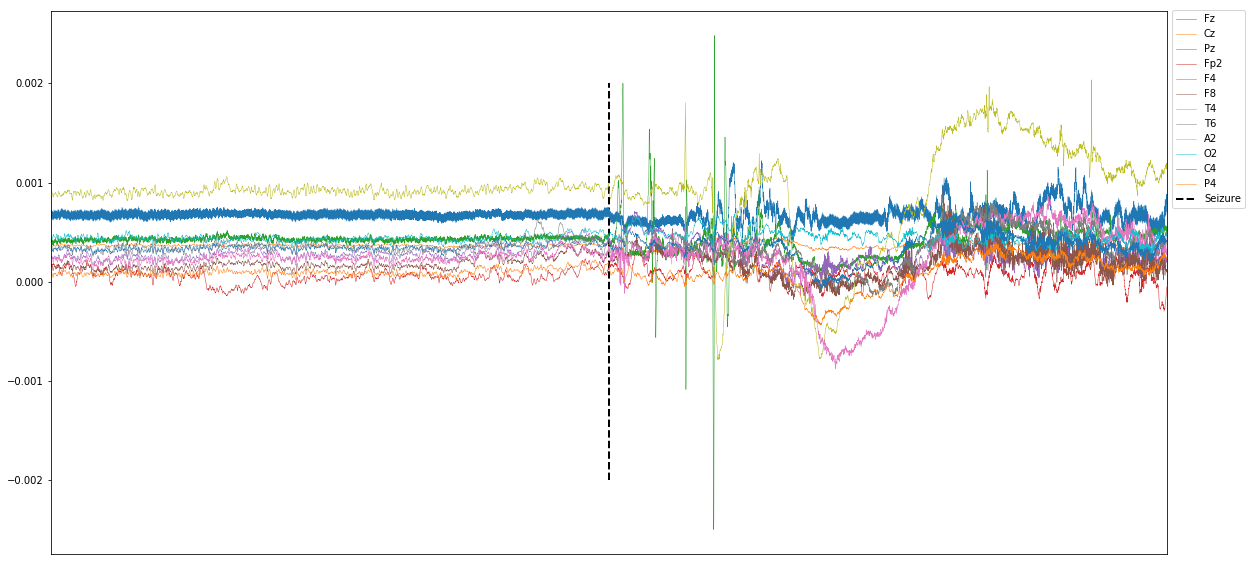

9. Plot of JM sz2.csv
Writing data done!


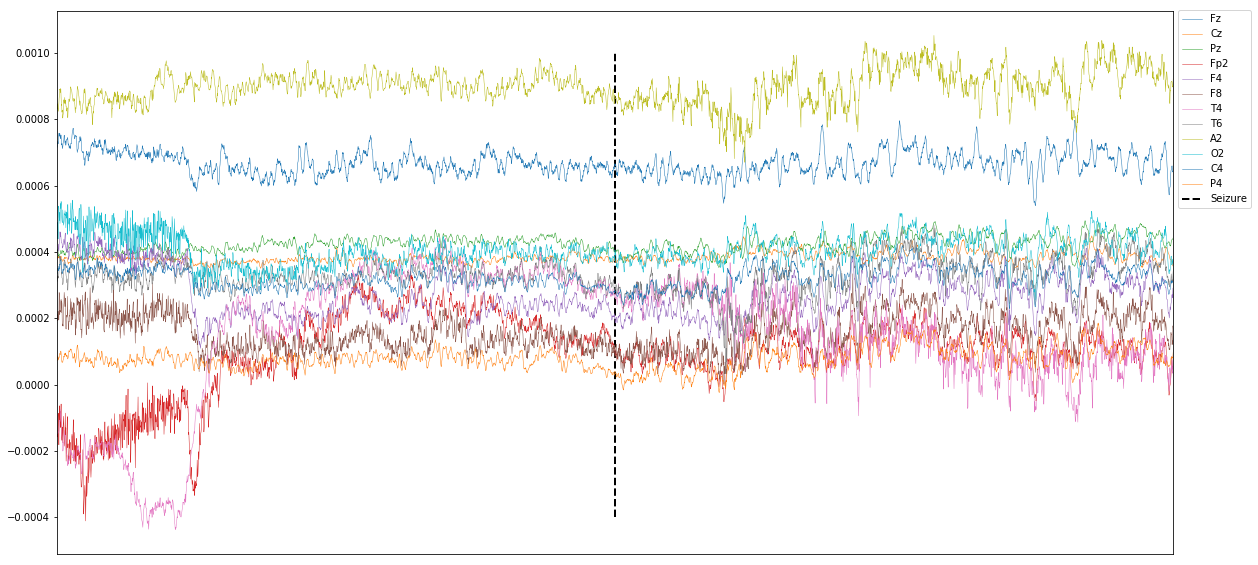

10. Plot of JM sz3.csv
Writing data done!


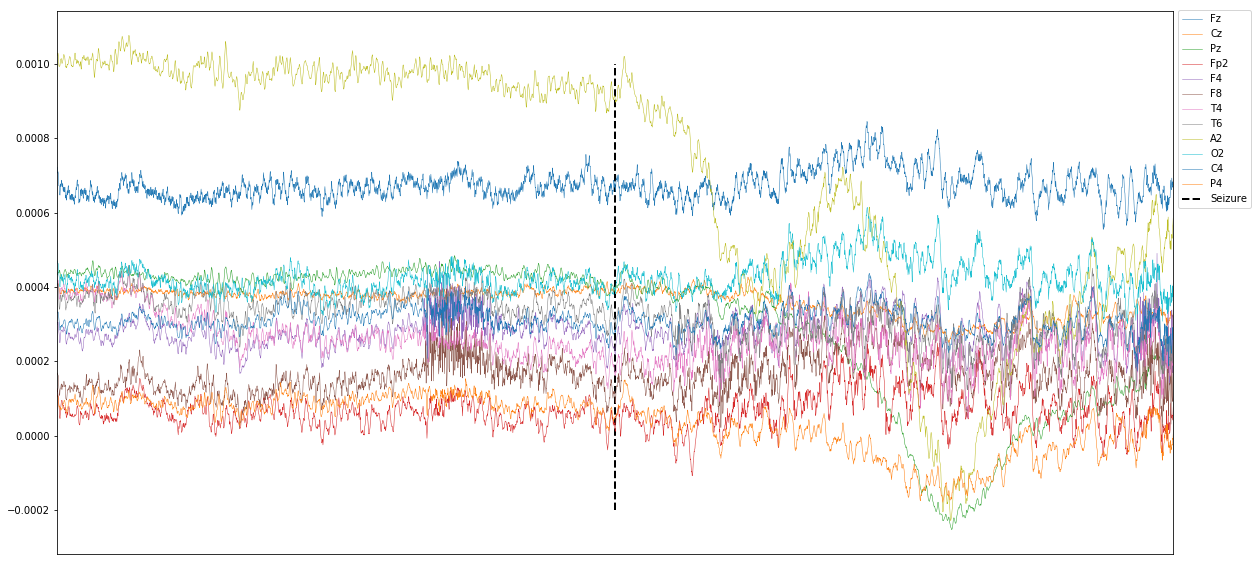

11. Plot of JM sz4.csv
Writing data done!
Saved noisy figure


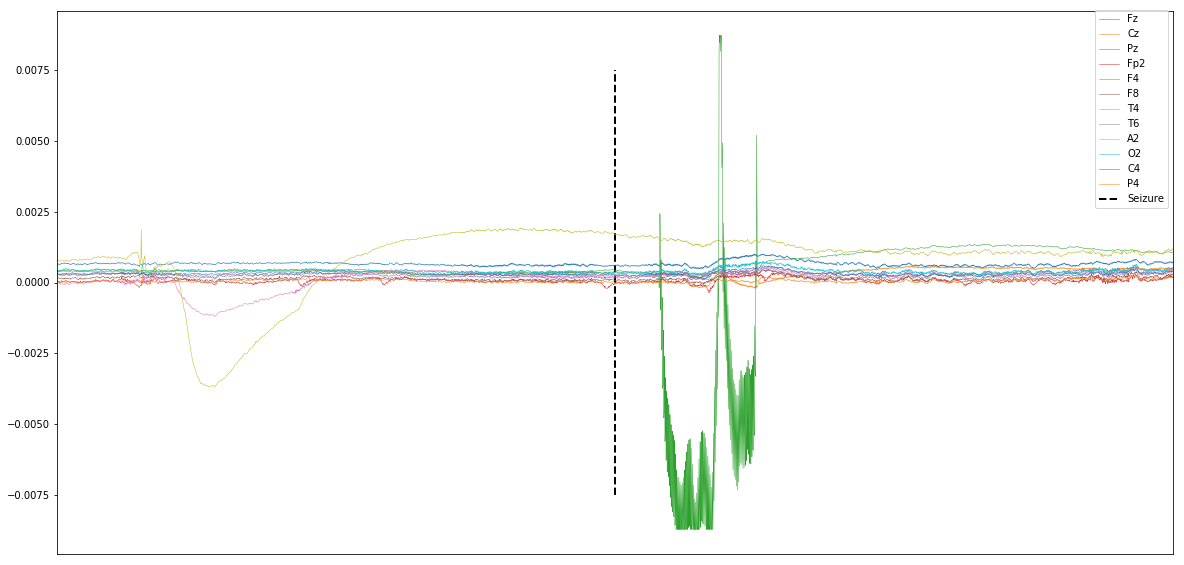

12. Plot of JM sz5.csv
Writing data done!


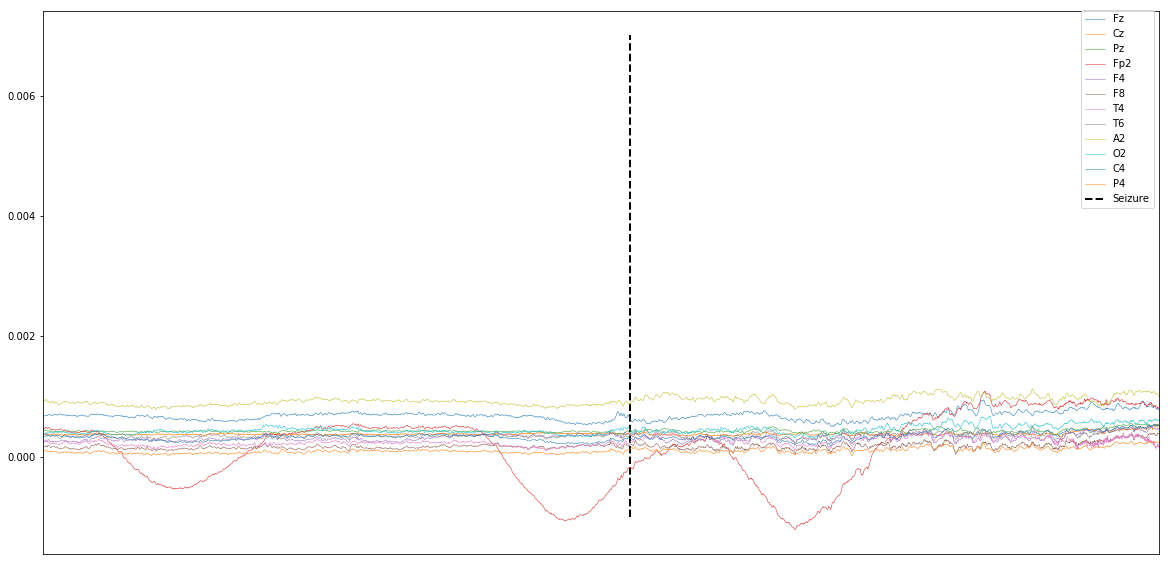

13. Plot of KS sz1.csv
Writing data done!


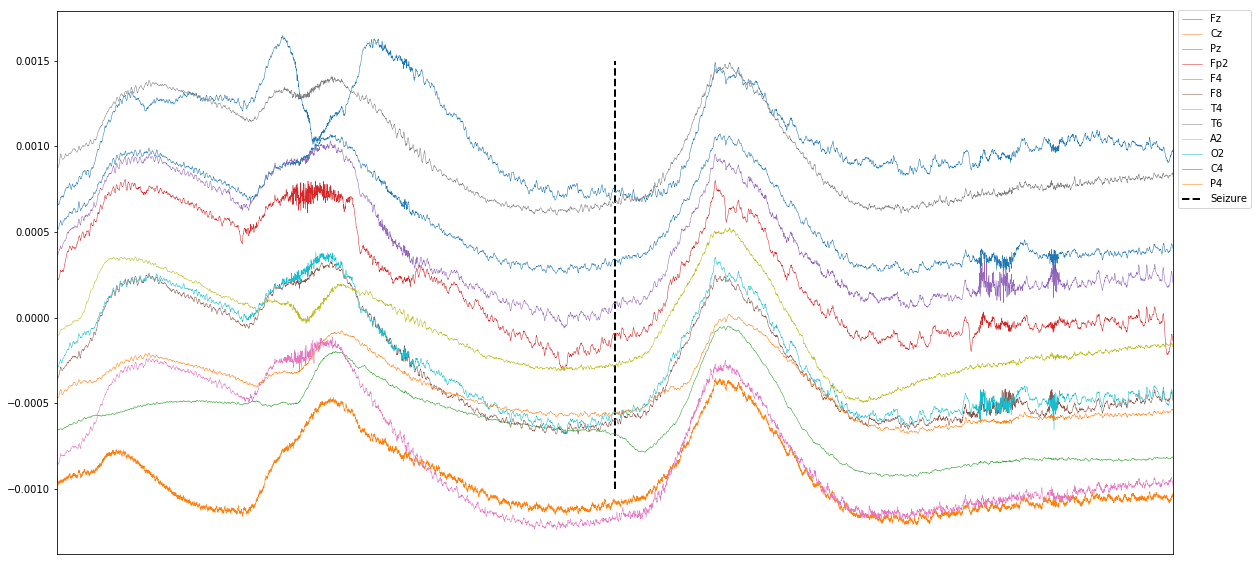

In [5]:
# Seizure Windows to be analysed
src_path = os.getcwd() + '//csv_clean//'
# all time in seconds(s)
start_times = [76, 69, 180.1, 2, 53, 118, 147.7, 63, 27, 27, 32, 22, 59]
ymin = [-0.001, -0.002, -0.001, -0.00125, -0.002, -0.002, -0.0003, -0.002, -0.0004, -0.0002, -0.0075, -0.001, -0.0010]
ymax = [+0.001, +0.006, +0.001, +0.00075, +0.001, +0.001, +0.0003, +0.002,  +0.001, +0.0010, +0.0075, +0.007, +0.0015]
delta_time_minus = [10, 10, 20, 2, 10, 20, 15, 20, 10, 10, 10, 10, 15]
delta_time_plus = [10, 10, 20, 3, 10, 20, 15, 20, 10, 10, 10, 9, 15]
ind = 0
for f in os.listdir(src_path):
    print(f"{ind+1}. Plot of {f}")
    df = pd.read_csv(src_path+f, index_col=0)
    seizure_time = start_times[ind]*200 -1 
    seizure_start_time = (start_times[ind]-delta_time_minus[ind])*200 - 1
    seizure_end_time = (start_times[ind]+delta_time_plus[ind])*200 + 1
    if ind != 6:
        curr_data = df.loc[seizure_start_time:seizure_end_time, :]
        plot = df.loc[seizure_start_time:seizure_end_time,'Fz':].plot(linewidth=0.5, figsize=(20,10))
        plt.vlines(x=start_times[ind]*200-1, ymin=ymin[ind], ymax=ymax[ind], linestyles='dashed', linewidth=2, label='Seizure')
        print('Writing data done!')
        if ind==10:
            plt.savefig('DM sz1.jpg')
            print('Saved noisy figure')

    else:
        seizure_time = start_times[ind]*256 -1 
        seizure_start_time = (start_times[ind]-delta_time_minus[ind])*256 - 1
        seizure_end_time = (start_times[ind]+delta_time_plus[ind])*256 + 1
        curr_data = df.loc[seizure_start_time:seizure_end_time, :]
        #curr_df = curr_data.to_csv(os.getcwd()+'//csv_seizure//'+f,header=True)
        plot = df.loc[seizure_start_time:seizure_end_time,'Cz':].plot(linewidth=0.5, figsize=(20,10))
        plt.vlines(x=start_times[ind]*256-1, ymin=ymin[ind], ymax=ymax[ind], linestyles='dashed', linewidth=2, label='Seizure')
        plt.ylim(-0.00035, +0.00035)
        print("Writing data done!")
    _ = plt.legend(bbox_to_anchor=(1.0, 1.01))
    _ = plt.xticks([])
    plt.show()
    ind += 1

### Preictal State data
This data is the primary data for the consideration of the analysis. The following parameters play a role in determining the values that are considered for predicting the seizure. 

`start_time` = 0 <br>
`preictal_end_time` = `seizure_start_time` - `delta_minus_time`

Using this window of 'anticipation' opportunity we can add move using 1 second non-overlapping intervals and thus creating a sample of data to consider for feature extraction. The clinical start or the `seizure_start_time` plays an important role. This parameter denotes the first occurence of the actual seizure in the patient. Although there is a chance of multiple ictal states in the given data it is best to find the first occurence after which preventive actions can be taken in order to subside the consecutive occurence of the seizures. 

In [21]:
# Define the window
preictal_end_time = [x1 - x2 for (x1, x2) in zip(start_times, [1]*13)]
preictal_start_time = [0]*13

# Get the data and store in a folder
src_path = os.getcwd() + "//csv_clean//"
dest_path = os.getcwd() + "//csv_preictal_window//"

# Get the data from source path and store the preictal state values
for ind, f in enumerate(os.listdir(src_path)):
    print(f'{ind+1}. Writing window of {f}')
    start_time = preictal_start_time[ind]
    if ind != 6:
        end_time = preictal_end_time[ind]*200 + 1
    else:
        end_time = preictal_end_time[ind]*256 + 1
    clean_df = pd.read_csv(src_path+f,index_col=0)
    preictal_df = clean_df.loc[start_time:end_time, :]
    preictal_df.to_csv(dest_path+f,header=True)
print("Writing Preictal Window of data Done!")

1. Writing window of AB sz1.csv
2. Writing window of AI sz1.csv
3. Writing window of AI sz2.csv
4. Writing window of CR sz1.csv
5. Writing window of CR sz2.csv
6. Writing window of CR sz3.csv
7. Writing window of DM sz1.csv
8. Writing window of JM sz1.csv
9. Writing window of JM sz2.csv
10. Writing window of JM sz3.csv
11. Writing window of JM sz4.csv
12. Writing window of JM sz5.csv
13. Writing window of KS sz1.csv
Writing Preictal Window of data Done!


### Visualizing the Preictal State data
The data is in the folder `/csv_preictal_window`. This is the data that is to be analysed using the windows method. 

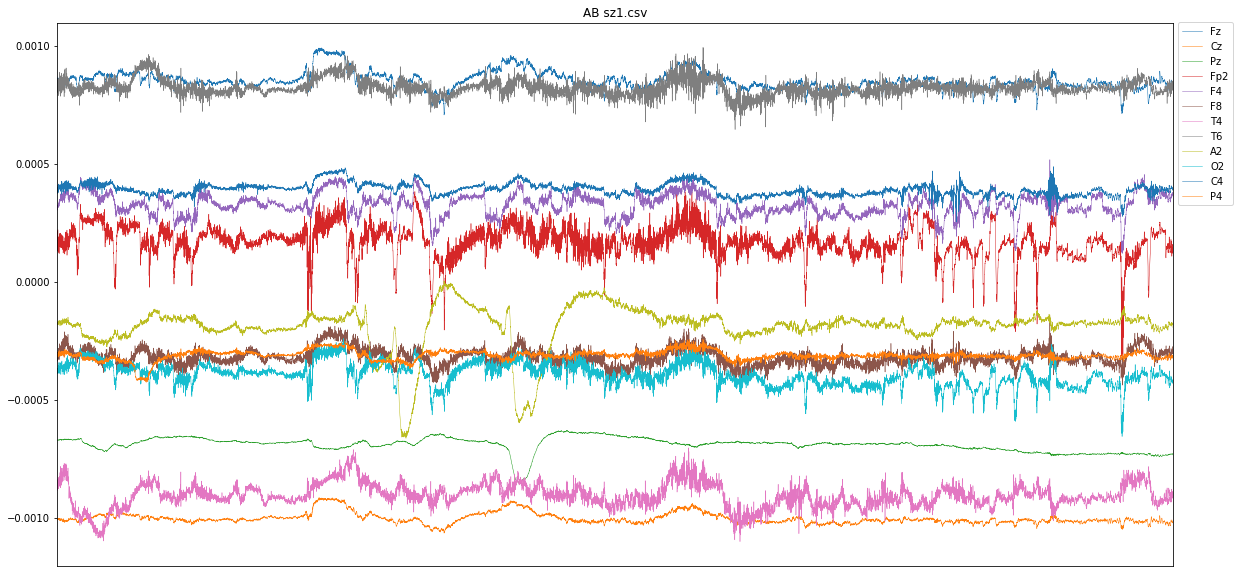

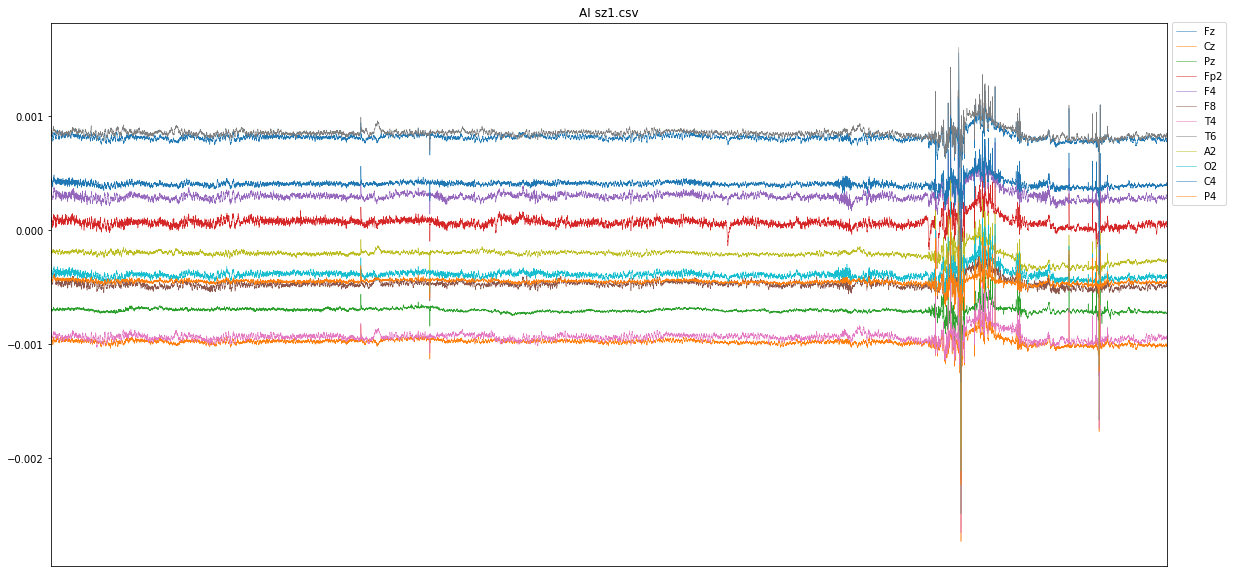

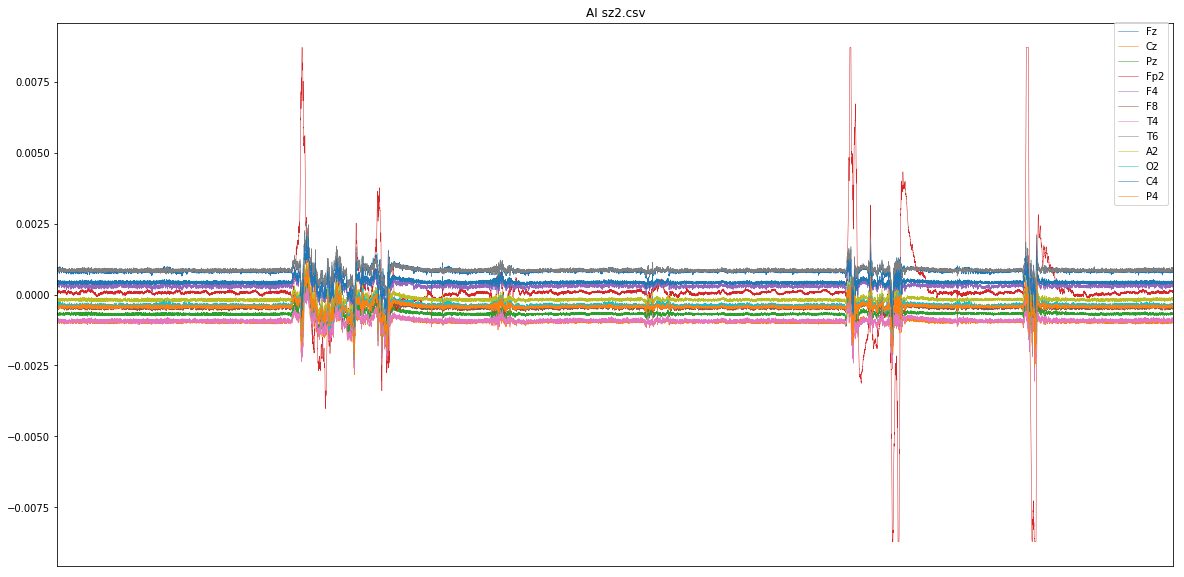

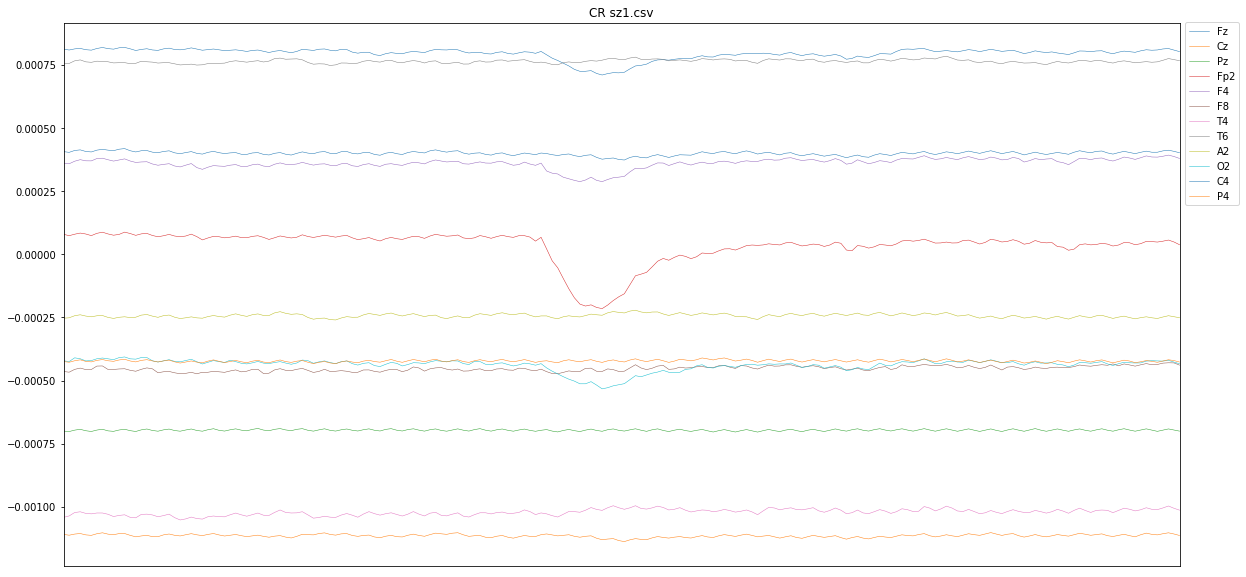

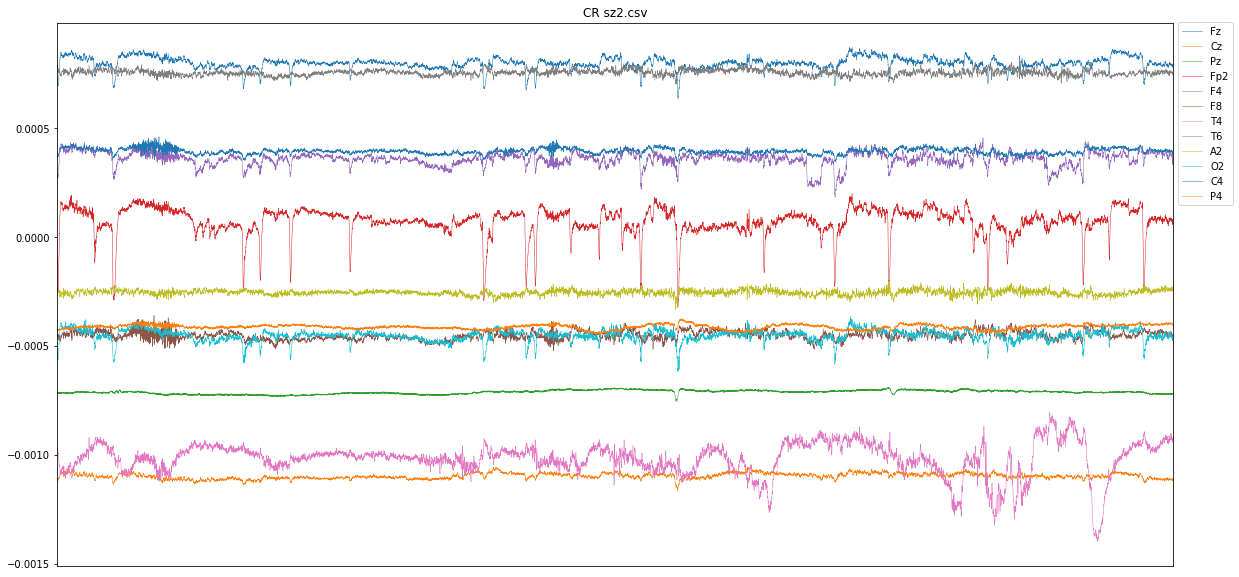

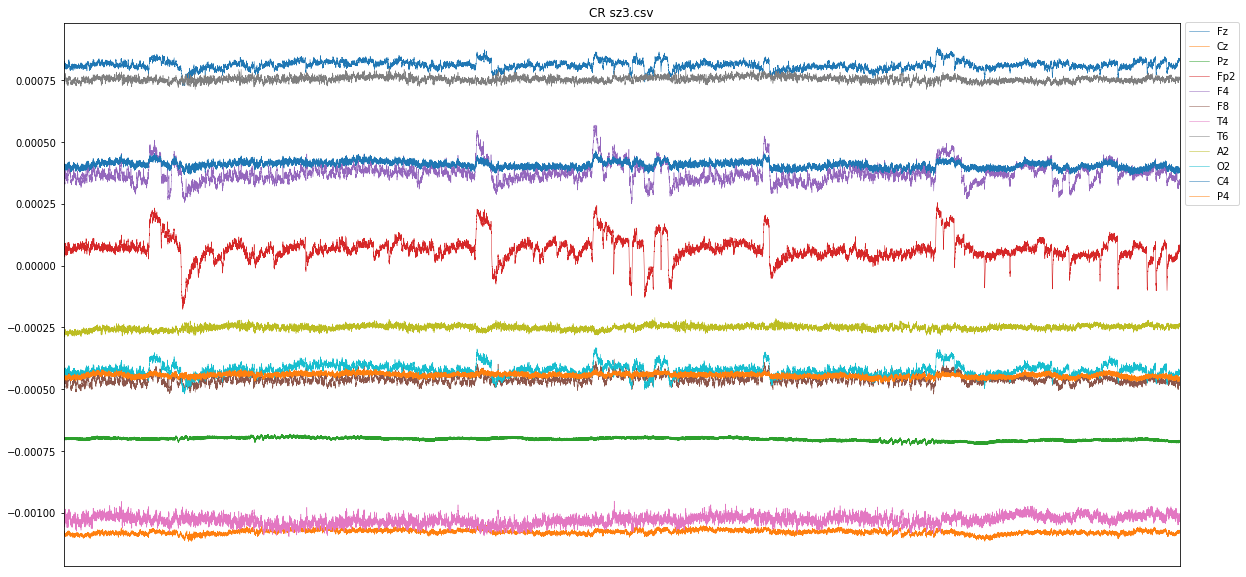

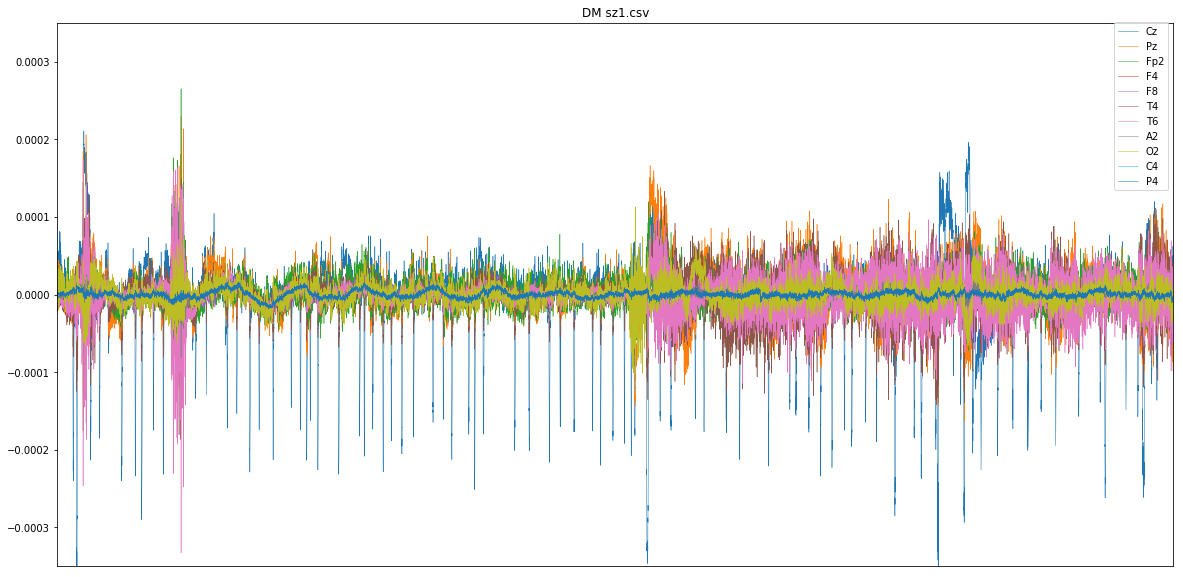

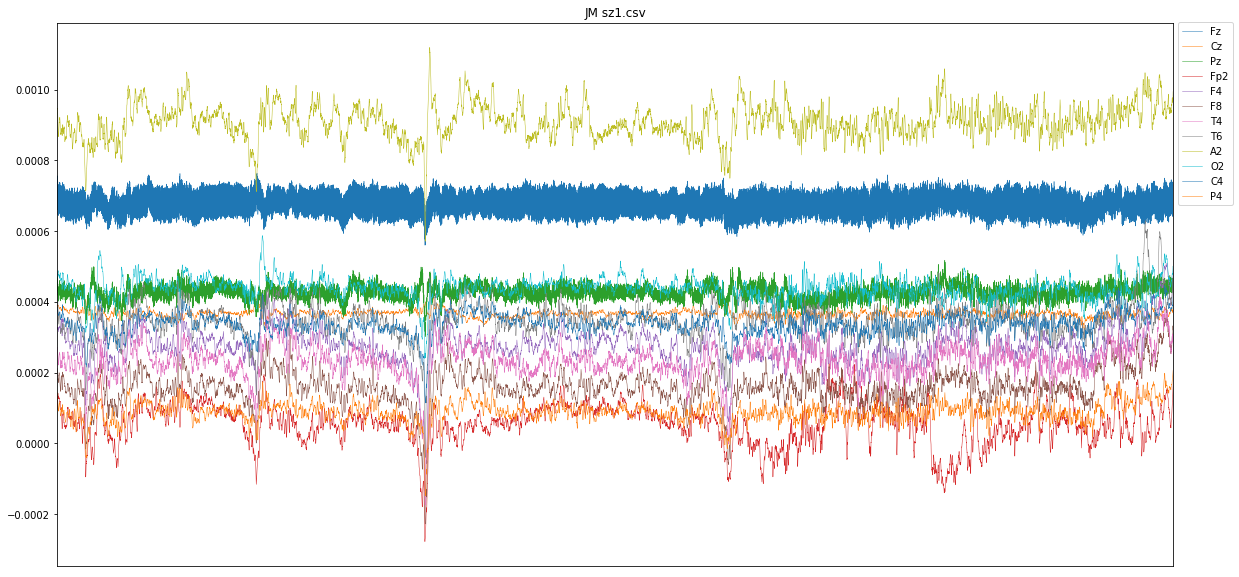

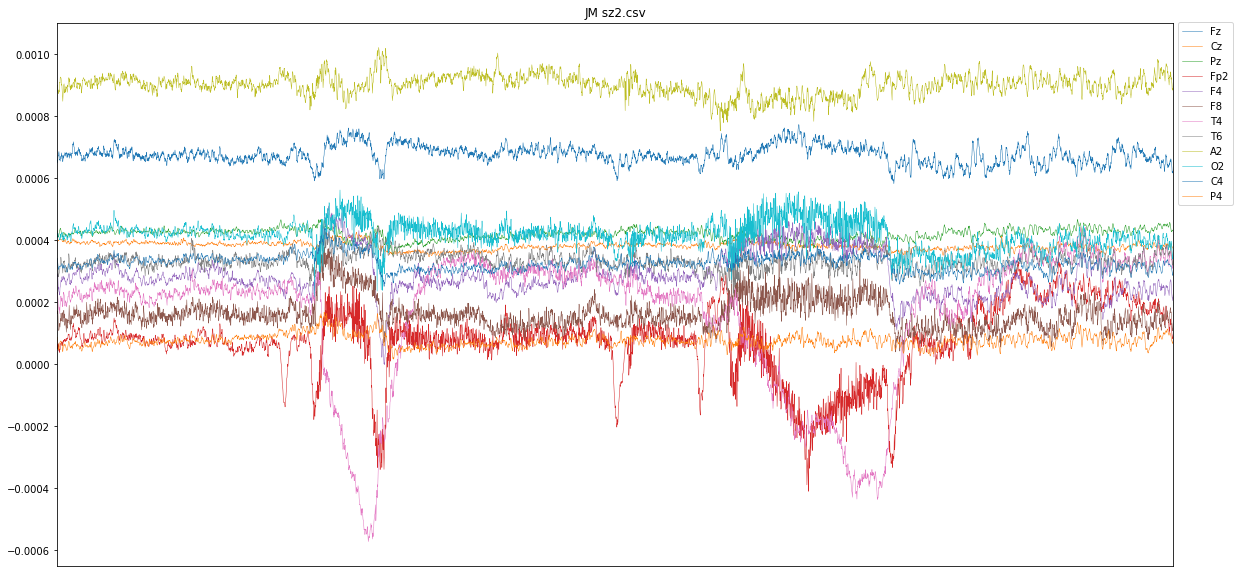

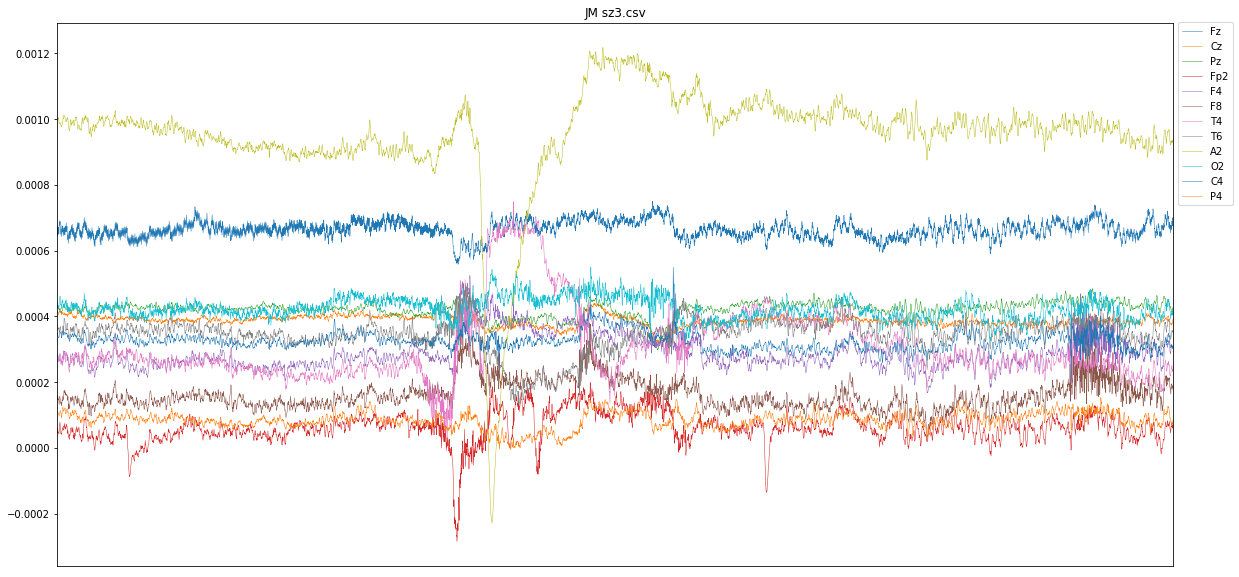

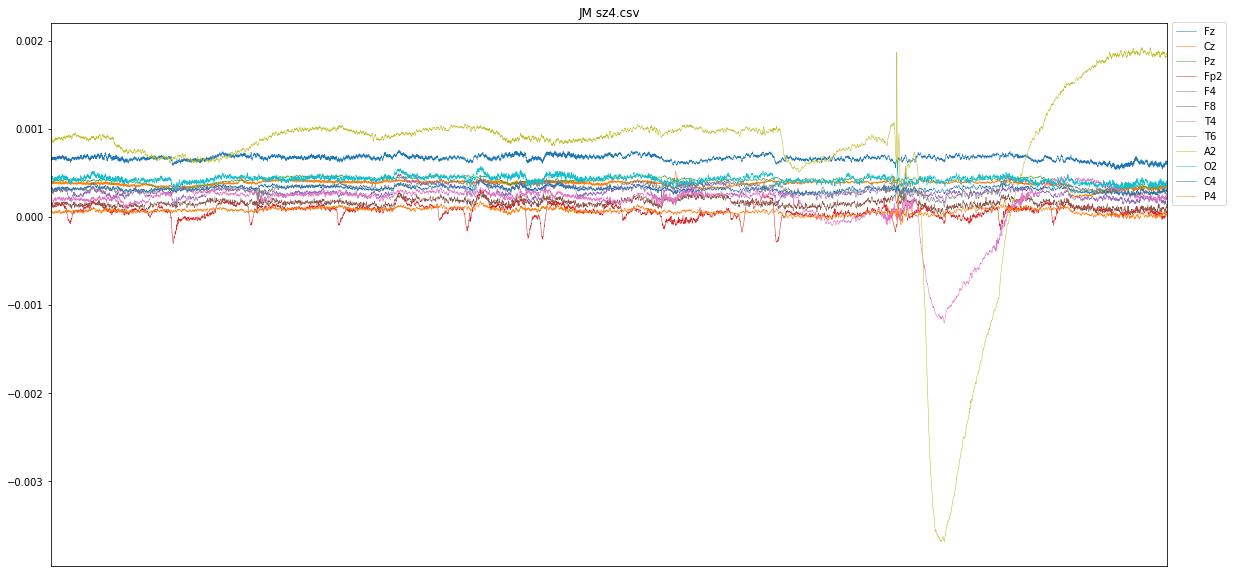

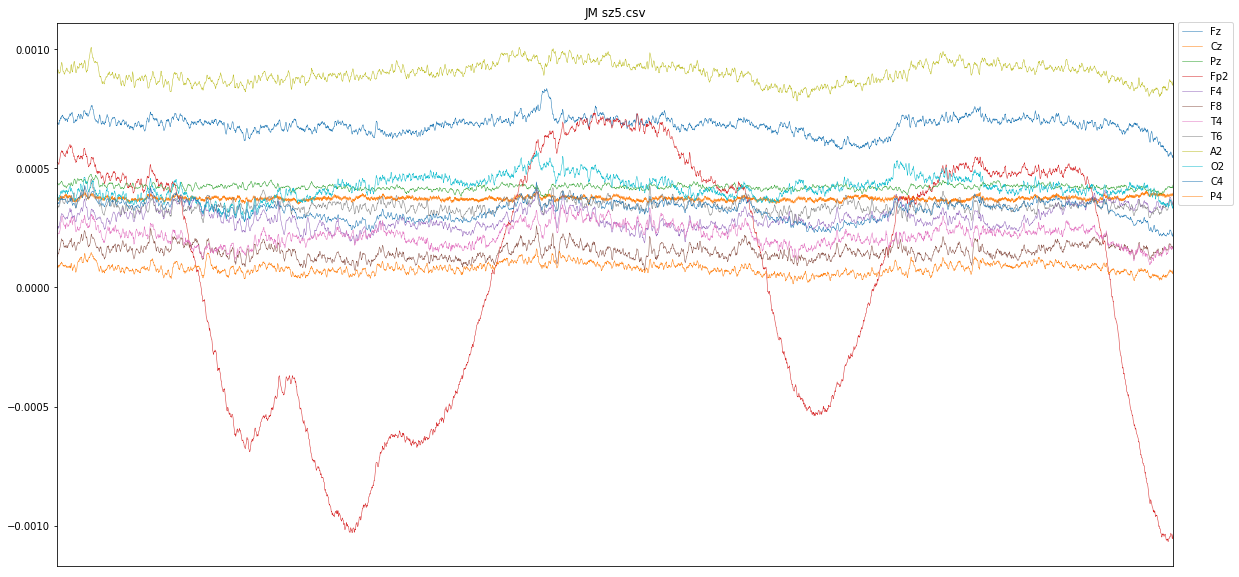

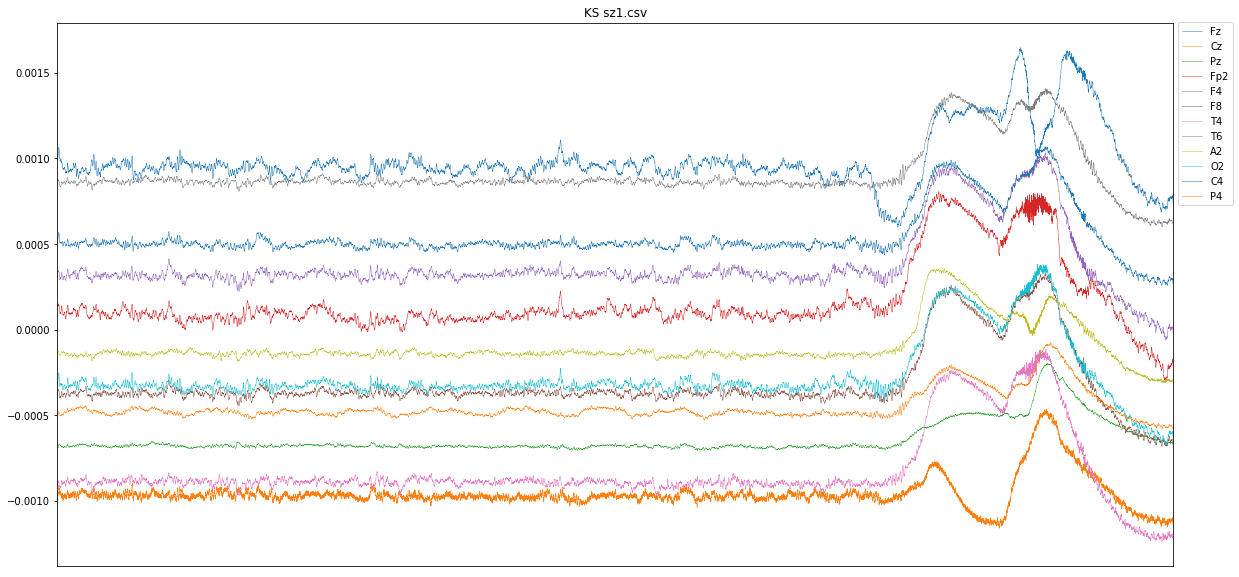

In [23]:
# Opening the Folder
src_path = os.getcwd() + "//csv_preictal_window//"
for ind, f in enumerate(os.listdir(src_path)):
    curr_csv = pd.read_csv(src_path+f, index_col=0)
    if ind != 6:
        curr_csv.loc[:,'Fz':].plot(linewidth=0.5, figsize=(20,10))
    else:
        curr_csv.loc[:,'Cz':].plot(linewidth=0.5, figsize=(20,10))
        plt.ylim(-0.00035, +0.00035)
    _ = plt.title(f)
    _ = plt.legend(bbox_to_anchor=(1, 1.01))
    _ = plt.xticks([])

### Visualising the Noisy channels of a Record

Saving figure done


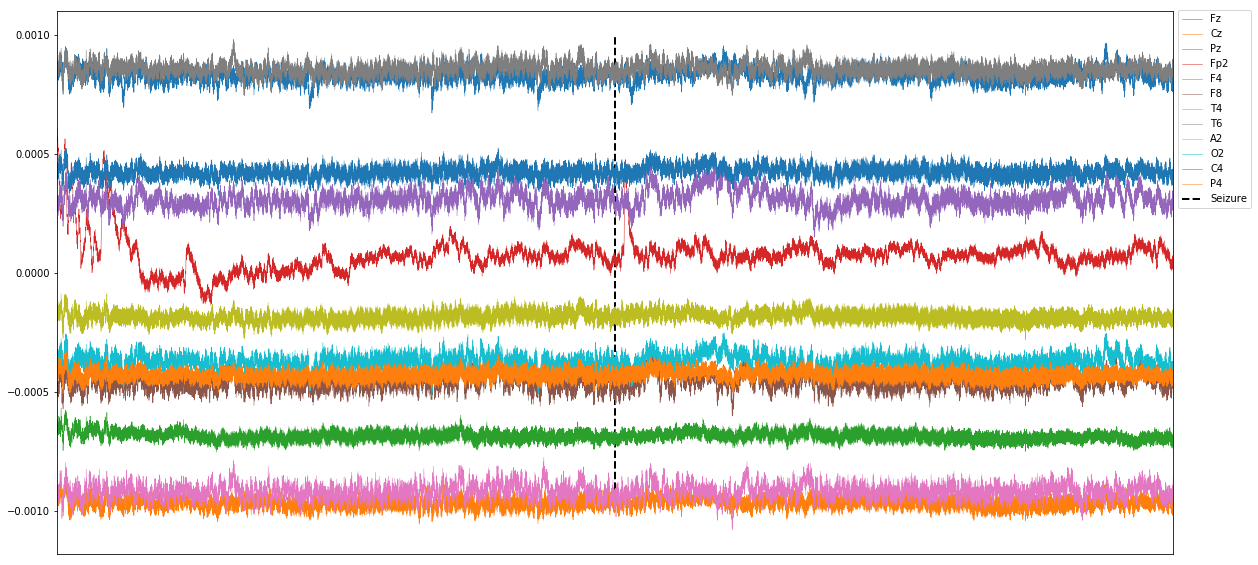

In [7]:
src_path = os.getcwd() + '//csv_clean//'
start_times = [76, 69, 180.1, 2, 53, 118, 147.7, 63, 27, 27, 32, 22, 59]
ymin = [-0.001, -0.002, -0.001, -0.00125, -0.002, -0.002, -0.0003, -0.002, -0.0004, -0.0002, -0.0075, -0.001, -0.0010]
ymax = [+0.001, +0.006, +0.001, +0.00075, +0.001, +0.001, +0.0003, +0.002,  +0.001, +0.0010, +0.0075, +0.007, +0.0015]
delta_time_minus = [10, 10, 20, 2, 10, 20, 15, 20, 10, 10, 10, 10, 15]
delta_time_plus = [10, 10, 20, 3, 10, 20, 15, 20, 10, 10, 10, 9, 15]
for ind, f in enumerate(os.listdir(src_path)):
    if ind==2:
        df = pd.read_csv(src_path+f, index_col=0)
        seizure_time = start_times[ind]*200 -1 
        seizure_start_time = (start_times[ind]-delta_time_minus[ind])*200 - 1
        seizure_end_time = (start_times[ind]+delta_time_plus[ind])*200 + 1
        curr_data = df.loc[seizure_start_time:seizure_end_time, :]
        plot = df.loc[seizure_start_time:seizure_end_time,'Fz':].plot(linewidth=0.5, figsize=(20,10))
        plt.vlines(x=start_times[ind]*200-1, ymin=ymin[ind], ymax=ymax[ind], linestyles='dashed', linewidth=2, label='Seizure')
        _ = plt.legend(bbox_to_anchor=(1.0, 1.01))
        _ = plt.xticks([])
        plt.savefig('Noisy AI sz2.jpg')
        print('Saving figure done')

### Visualizing the Noisy data after the removal of noise using ICA

Saving figure done


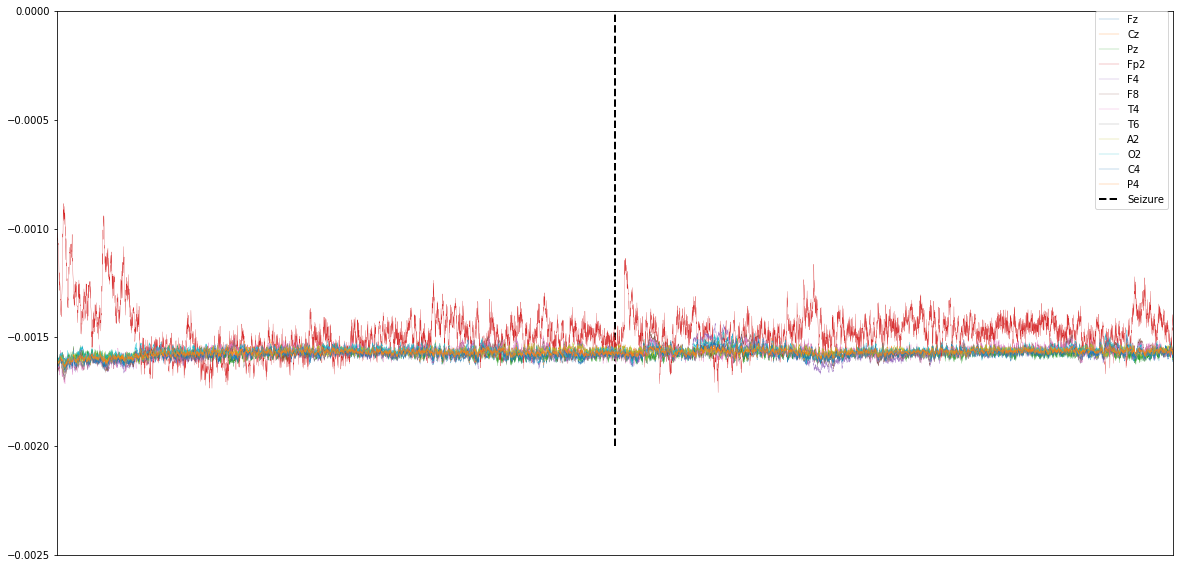

In [40]:
src_path = os.getcwd() + '//Denoised Data//'
ind = 0
start_times = [180.1]
ymin = [-0.001]
ymax = [0.001]
delta_time_minus = [20]
delta_time_plus = [20]
df = pd.read_csv(src_path+'denoised.csv')
seizure_time = start_times[ind]*200 -1 
seizure_start_time = (start_times[ind]-delta_time_minus[ind])*200 - 1
seizure_end_time = (start_times[ind]+delta_time_plus[ind])*200 + 1
curr_data = df.loc[seizure_start_time:seizure_end_time, :]
plot = df.loc[seizure_start_time:seizure_end_time,'Fz':].plot(linewidth=0.25, figsize=(20,10))
plt.vlines(x=start_times[ind]*200-1, ymin=2*ymin[ind], ymax=ymax[ind], linestyles='dashed', linewidth=2, label='Seizure')
_ = plt.legend(bbox_to_anchor=(1.0, 1.01))
_ = plt.xticks([])
plt.ylim(-0.0025,0)
plt.savefig('Denoised AI sz2.jpg')
print('Saving figure done')